In [1]:
"""
Matplotlib 常用函数总结:

# 1. plt.figure(2,figsize=(3,3)) / plt.subplot(221)
# 2. plt.plot(x1,y1,'ro',x2,y2,'b--')
     plt.scatter('A','B',data=data,c='C',s='D')
     plt.hist()
     plt.bar(x,y)
     ...
# 3. plt.gca().set(xlim=(1,2),ylim(3,4),xlabel='a',ylabel='b')
     plt.axis([1, 2, 3, 4]) 同xlim ylim
     plt.xlim(1,2)
     plt.xlabel('a')
     plt.xticks(fontsize=12)
     plt.yticks(fontsize=12)
     plt.title('iou',fontsize=22)
     plt.suptitle('Categorical Plotting')
     plt.legend(fontsize=12)
     plt.setp(plot_object, color='r', linewidth=2.0)
     plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
     plt.grid(True)
     plt.yscale('log') / plt.yscale('logit')
  
# 4. plt.show()
"""

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

large = 22
med = 16
small = 12
params={'axes.titlesize':large,
        'legend.fontsize':med,
        'figure.figsize':(16,10),
        'axes.labelsize':med,
        'xtick.labelsize':med,
        'ytick.labelsize':med,
        'figure.titlesize':large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')


In [ ]:
""" 
1. 关联(Correlation) 一个变量相对于另一个变量如何变化
""" 

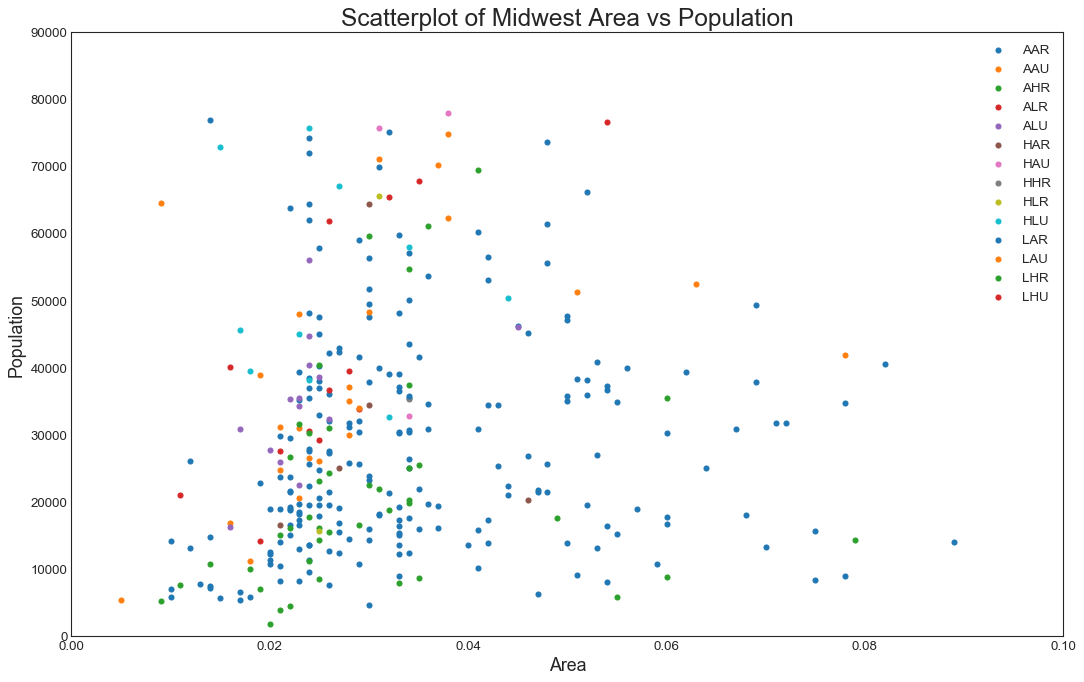

In [4]:
# 1.1 散点图 Scatter
midwest = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

# 每一个类别 对应一种颜色
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
# step-1  发起一个figure
plt.figure(figsize=(16,10),dpi=80,facecolor='w',edgecolor='k')
# step-2 plt.scatter()
for i,category in enumerate(categories):
    plt.scatter('area','poptotal',data=midwest.loc[midwest.category==category,:],s=20,cmap=colors[i],label=str(category))
# step-3 Decorations , plt.gca() 返回当前轴 retrun the current axes
plt.gca().set(xlim=(0.0,0.1),ylim=(0,90000),xlabel='Area',ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Scatterplot of Midwest Area vs Population',fontsize=22)
plt.legend(fontsize=12)
# step-4 show
plt.show()

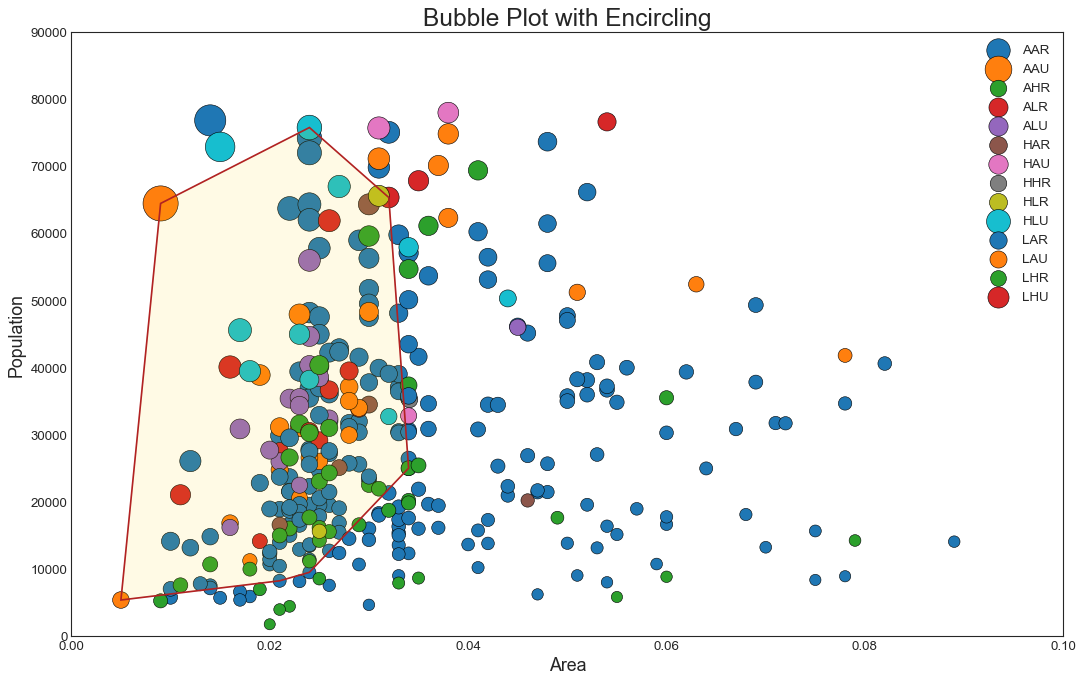

In [8]:
# 带边界的气泡图 Bubble plot with Encircling
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings
warnings.simplefilter('ignore')
sns.set_style('white')

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i,category in enumerate(categories):
    plt.scatter('area','poptotal',data=midwest.loc[midwest.category==category,:],s='dot_size', cmap=colors[i], label=str(category),
                edgecolors='black', linewidths=.5)

# step-3: Encircling
def encircle(x,y,ax=None,**kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:],**kw)
    ax.add_patch(poly)
    
# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]
# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)
# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

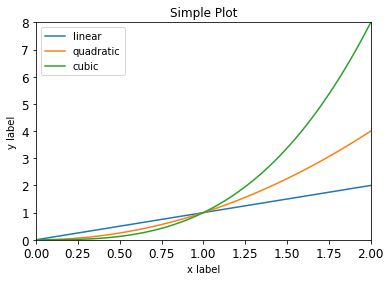

In [3]:
# Usage guide
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()         # an empty figure with no axes
# fig.subtitle('No axes on this figure')
# fig,ax_lst = plt.subplots(2,2)  # a figure with a 2x2 grid of Axes，axes是指一张图，一个figure可以有多个axes
                                  # 返回figure对象和axes对象，

x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')  # Subsequent calls to plt.plot，画在同一个axes中
plt.plot(x, x**3, label='cubic')      # re-use the current axes and each add another line

plt.xlabel('x label')
plt.ylabel('y label')

plt.xlim(0,2)
plt.ylim(0,8)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Simple Plot")
plt.legend()
plt.show()

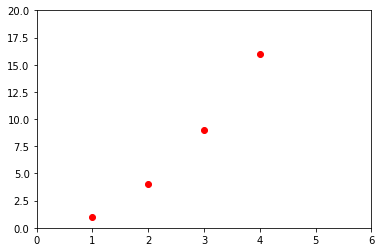

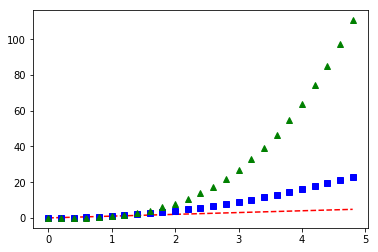

In [4]:
# Pyplot tutorial

# plt.axis() 设置轴的范围
plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')  # 'red' 'o'
plt.axis([0, 6, 0, 20])    # [xmin, xmax, ymin, ymax]
plt.show()

# 设置线形、颜色等
plt.figure()
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

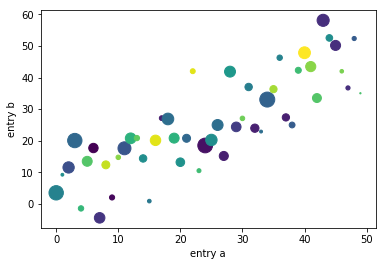

In [10]:
# Plotting with keyword strings
# Matplotlib allows you provide such an object with the data keyword argument.
# If provided, then you may generate plots with the strings corresponding to these variables.

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data) # 提供data 和 dict的键作为参数（也可以是DataFrame的columns）
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


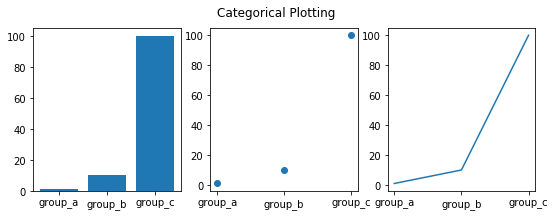

In [11]:
# Plotting with categorical variables
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)  # 传递类别变量'group_a','group_b','group_c'给bar函数，可以不是数值型
plt.subplot(132)
plt.scatter(names, values)  # 同
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

[None, None, None, None]

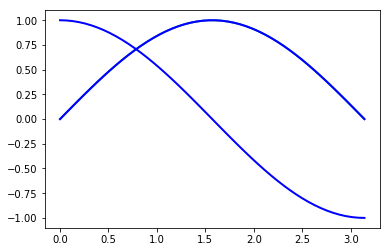

In [13]:
# Controlling line properties
# Lines have many attributes that you can set: linewidth, dash style, antialiased

# 1. Use keyword args
x = np.linspace(0,np.pi,50)
y = np.sin(x)
plt.plot(x, y, linewidth=2.0)   

# 2. Use the setp() command
x1,y1 = x,y
x2 = x
y2 = np.cos(x)
lines = plt.plot(x1, y1, x2, y2)
   # use keyword args to set properties
plt.setp(lines, color='r', linewidth=2.0)
   # or MATLAB style string value pairs
plt.setp(lines, 'color', 'b', 'linewidth', 2.0)

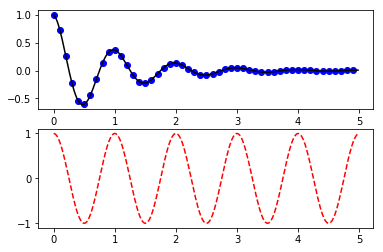

c:\users\ljj\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Easy as 1, 2, 3')

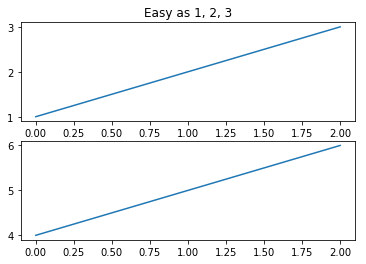

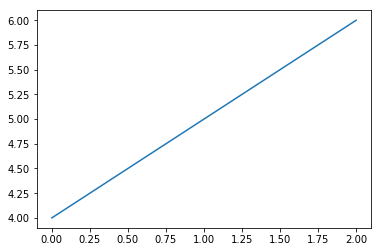

In [16]:
# Working with multiple figures and axes: plt.figure(n),plt.subplot(312)
# The function gca() returns the current axes,(a matplotlib.axes.Axes instance), 
# gcf() returns the current figure (matplotlib.figure.Figure instance)

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# The subplot() command specifies numrows, numcols, plot_number 
# where plot_number ranges from 1 to numrows*numcols
plt.figure(1)
plt.subplot(211)  # figure中的所有图排成2行1列，第1个图
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)  # 2行1列，第2个图
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

# using multiple figure()，each figure can contain as many axes and subplots
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

# 修改figure1 的211的图
plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

# clearing the current figure with clf() and the current axes with cla()
# close() 关闭figure，要显示调用，不会自动关闭内存

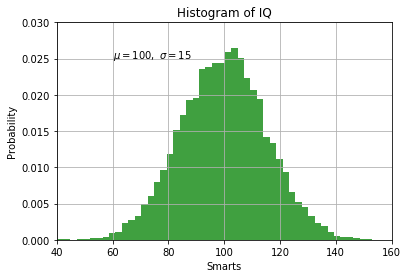

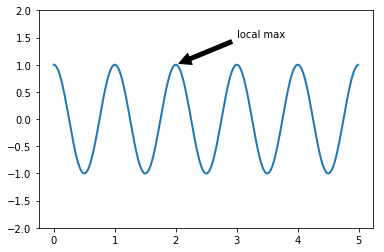

In [17]:
# Working with text
# xlabel() / ylabel() / title() / text()在图中加文本

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

# plt.annotate() 加注释
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

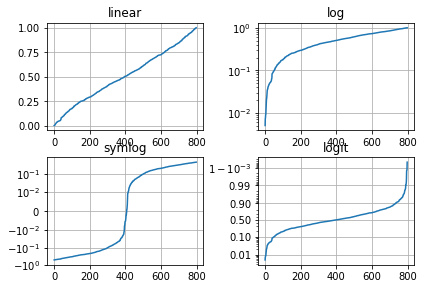

In [20]:
# Logarithmic and other nonlinear axes: plt.xscale('log')

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
# 调整多个subplots之间的间距
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()